In [82]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Problem 3

In [83]:
hw4reg = pickle.load(open('hw4reg.pkl', 'rb'))

In [84]:
print(hw4reg['data'].shape)
print(hw4reg['labels'].shape)
print(hw4reg['valdata'].shape)
print(hw4reg['vallabels'].shape)
print(hw4reg['testdata'].shape)
print(hw4reg['testlabels'].shape)

(500,)
(500,)
(100,)
(100,)
(500,)
(500,)


In [85]:
def predict(alpha, data):
    prediction = []
    for d in data:
        data = d * np.ones(len(alpha))
        k = np.minimum(data, hw4reg['data'])
        prediction.append(alpha @ k)
    return prediction

In [86]:
"""
part(b)
"""
data = np.array(hw4reg['data'], dtype=float)
valdata = np.array(hw4reg['valdata'], dtype=float)
labels = np.array(hw4reg['labels'], dtype=float)
vallabels = np.array(hw4reg['vallabels'], dtype=float)

mses = []
powers = range(-20, 21)

K = np.minimum.outer(data, data)

for power in powers:
    lam = pow(2, power)
    id = np.identity(K.shape[0]) * lam
    x = K + id
    
    alpha = np.linalg.pinv(x).dot(labels)
    
    # get prediction
    val_pred = predict(alpha, valdata)
    
    # calculate mse
    mse = np.square(np.subtract(val_pred, vallabels)).mean()
    mses.append(mse)

# find lambda value for the smallest mse and use it onward
min_lambda = pow(2, powers[np.argmin(mses)])
final_x = K + np.identity(K.shape[0]) * min_lambda
final_alpha = np.linalg.pinv(final_x).dot(labels)

In [87]:
print(min_lambda)
print(mses)

0.25
[0.1785453384351681, 0.17844313057721942, 0.1782248374534719, 0.17775245658410246, 0.17675397482730737, 0.17481038757535472, 0.171508340684408, 0.16673878319035076, 0.1608649303142362, 0.1545693915498927, 0.14855960359986056, 0.14337467249591349, 0.13933335710702502, 0.13641227072455472, 0.13412387093442601, 0.13179978739033543, 0.12916321865536132, 0.1266249136963054, 0.12519248779401887, 0.12624895463654626, 0.13125780840106221, 0.14119635698800076, 0.15631069245755547, 0.17723123121866277, 0.20509993568960128, 0.23907324495167956, 0.2760492989815405, 0.31619428404869054, 0.3634227923317983, 0.41494287035926236, 0.4601811861258998, 0.49222080723051975, 0.511709269389598, 0.5225262411023517, 0.5282347147422322, 0.53116839492532, 0.5326556845453883, 0.5334045174988276, 0.5337802406214783, 0.5339684300544192, 0.5340626068906185]


In [88]:
# apply test data
testdata = np.array(hw4reg['testdata'], dtype=float)
testlabels = np.array(hw4reg['testlabels'], dtype=float)

test_pred = predict(final_alpha, testdata)
test_mse = np.square(np.subtract(test_pred, testlabels)).mean()

print(test_mse)

0.10949523552572395


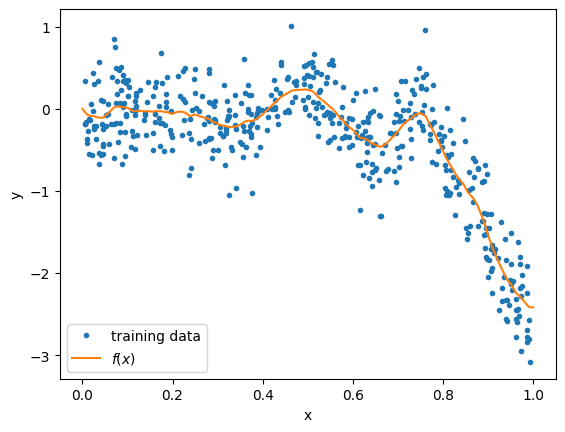

In [89]:
pred = predict(final_alpha, hw4reg['grid']) 
plt.figure()
plt.plot(hw4reg['data'], hw4reg['labels'], '.')
plt.plot(hw4reg['grid'], pred, linestyle='-')
plt.legend(['training data', '$f(x)$'], loc='lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('hw4reg.pdf', bbox_inches='tight')

In [90]:
import math

In [91]:
"""
part(c)
"""
# construct gaussian kernel K
def gaussian_kernel(sigma, data):
    K_gaussian = np.zeros((len(data),len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            x1 = data[i]
            x2 = data[j]
            K_gaussian[i][j] = math.exp(-(x1-x2)*(x1-x2)/(2*sigma*sigma))
    return K_gaussian

In [92]:
def predict_gaussian(alpha, data, sigma):
    prediction = []
    for d in data:
        testd = d * np.ones(len(alpha))
        traind = hw4reg['data']
        k = np.exp(np.divide(np.square(traind - testd), 2*sigma*sigma)*(-1))
        prediction.append(alpha @ k)
    return prediction

In [93]:
data = np.array(hw4reg['data'], dtype=float)
valdata = np.array(hw4reg['valdata'], dtype=float)
labels = np.array(hw4reg['labels'], dtype=float)
vallabels = np.array(hw4reg['vallabels'], dtype=float)

sigmas = np.linspace(0.1, 1.0, num=9)
min_mse_guassian = float('inf')
min_sigma = None
min_lambda_gaussian = None

for sigma in sigmas:
    for power in powers:
        lam = pow(2, power)
        id = np.identity(K.shape[0]) * lam
        K_gaussian = gaussian_kernel(sigma, data)
        x = K_gaussian + id
        
        alpha = np.linalg.pinv(x).dot(labels)
        
        # get prediction
        val_pred = predict_gaussian(alpha, valdata, sigma)
        
        # calculate mse
        mse = np.square(np.subtract(val_pred, vallabels)).mean()
        if mse < min_mse_guassian:
            min_mse_guassian = mse
            min_sigma = sigma
            min_lambda_gaussian = lam

# find lambda value for the smallest mse and use it onward
K_gaussian = gaussian_kernel(min_sigma, data)
final_x_gaussian = K_gaussian + np.identity(K_gaussian.shape[0]) * min_lambda_gaussian
final_alpha_gaussian = np.linalg.pinv(final_x_gaussian).dot(labels)

In [94]:
# apply test data
test_pred_gaussian = predict_gaussian(final_alpha_gaussian, testdata, min_sigma)
test_mse_gaussian = np.square(np.subtract(test_pred_gaussian, testlabels)).mean()

print(test_mse_gaussian)

0.11431527284842233


In [108]:
print(min_sigma, min_lambda_gaussian)

0.1 1


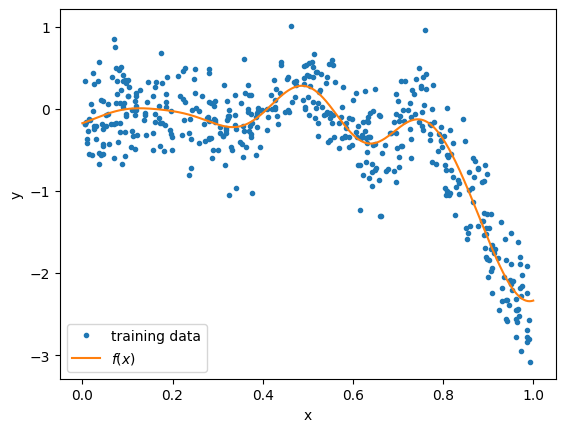

In [95]:
pred_gaussian = predict_gaussian(final_alpha_gaussian, hw4reg['grid'], min_sigma) 
plt.figure()
plt.plot(hw4reg['data'], hw4reg['labels'], '.')
plt.plot(hw4reg['grid'], pred_gaussian, linestyle='-')
plt.legend(['training data', '$f(x)$'], loc='lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('hw4regc.pdf', bbox_inches='tight')

# Problem 5

In [96]:
vocab = {}
vocab_size = 0
reviews = []

with open('reviews_limited_vocab.txt', 'r') as f:
    for line in f.readlines():
        words = line.strip().split(' ')
        for word in words:
            if word not in vocab:
                vocab[word] = vocab_size
                vocab_size += 1
        reviews.append([vocab[word] for word in words])

invert_vocab = [''] * vocab_size
for (word, word_id) in vocab.items():
    invert_vocab[word_id] = word
invert_vocab = np.array(invert_vocab)

words_to_compare = ['excellent', 'amazing', 'delicious', 'fantastic', 'gem', 'perfectly', 'incredible', 'worst', 'mediocre', 'bland', 'meh', 'awful', 'horrible', 'terrible']

k_to_try = [ 2, 4, 8 ]

In [97]:
vocab

{'a': 0,
 'bit': 1,
 'about': 2,
 'the': 3,
 'many': 4,
 '4': 5,
 'and': 6,
 '5': 7,
 'star': 8,
 'reviews': 9,
 'have': 10,
 'wanted': 11,
 'to': 12,
 'try': 13,
 'this': 14,
 'place': 15,
 'for': 16,
 'while': 17,
 'it': 18,
 'seems': 19,
 'popular': 20,
 'enough': 21,
 'first': 22,
 'looks': 23,
 'nice': 24,
 'comfortable': 25,
 'seating': 26,
 'however': 27,
 'is': 28,
 'not': 29,
 'we': 30,
 'arrived': 31,
 'wasn': 32,
 't': 33,
 'busy': 34,
 'at': 35,
 'all': 36,
 'in': 37,
 'weren': 38,
 'greeted': 39,
 'had': 40,
 'ask': 41,
 'service': 42,
 'was': 43,
 'mediocre': 44,
 'best': 45,
 'took': 46,
 'food': 47,
 'disappointing': 48,
 'ordered': 49,
 'chicken': 50,
 'cheese': 51,
 'onion': 52,
 'veggie': 53,
 'pesto': 54,
 'garlic': 55,
 'mashed': 56,
 'potatoes': 57,
 'with': 58,
 'yes': 59,
 'are': 60,
 'large': 61,
 'should': 62,
 'be': 63,
 'they': 64,
 'stuffed': 65,
 'slices': 66,
 'of': 67,
 'potato': 68,
 'my': 69,
 'friend': 70,
 'take': 71,
 'them': 72,
 'out': 73,
 'becau

In [98]:
# construct the matrix
A = np.zeros((len(reviews), len(vocab)), dtype=float)
review_count = 0

for review in reviews:
    for id in review:
        A[review_count][id] += 1
    review_count += 1
        
A

array([[5., 1., 2., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 1., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [99]:
# get singular value decomposition
U, S, Vh = np.linalg.svd(A, full_matrices=False)
U

array([[-4.52789528e-03, -7.24018414e-03,  1.56357142e-03, ...,
         1.46453355e-04,  1.29882947e-03,  5.54913378e-04],
       [-1.67719993e-03, -8.04759861e-04,  5.06914494e-04, ...,
        -1.64247490e-04,  3.65386105e-04,  1.30491882e-03],
       [-2.59663425e-03, -1.03967291e-03,  1.17051215e-03, ...,
         1.52491707e-03,  7.14130035e-04, -1.64558692e-04],
       ...,
       [-3.21946413e-03,  2.93287492e-03,  4.55647778e-03, ...,
         2.29188507e-04,  8.11982437e-04,  1.41282138e-05],
       [-2.64699843e-03, -4.11420730e-03,  9.91783223e-04, ...,
        -1.15227062e-03,  1.64279794e-04,  1.06640837e-05],
       [-2.38667401e-03, -9.00430015e-04,  3.87289679e-03, ...,
        -1.61618361e-03,  6.91700228e-04, -7.86160901e-05]])

In [100]:
print(U.shape, S.shape, Vh.shape)

(100000, 1731) (1731,) (1731, 1731)


In [101]:
# get truncated U and the projection

truncated2 = U[:,:2]
res2 = truncated2 @ (truncated2.T @ A)

truncated4 = U[:,:4]
res4 = truncated4 @ (truncated4.T @ A)

truncated8 = U[:,:8]
res8 = truncated8 @ (truncated8.T @ A)

In [102]:
# find cosine similarity
n = len(words_to_compare)
sim_table = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        # get ids of pairs of words
        word1 = words_to_compare[i]
        word2 = words_to_compare[j]
        idx1 = vocab[word1]
        idx2 = vocab[word2]

        # get cols in vector representation
        # adjust accordingly for diff k values
        
        # col1 = res2[:,idx1]
        # col2 = res2[:,idx2]
        # col1 = res4[:,idx1]
        # col2 = res4[:,idx2]
        col1 = res8[:,idx1]
        col2 = res8[:,idx2]

        # calculate similarity
        norm1 = np.linalg.norm(col1)
        norm2 = np.linalg.norm(col2)
        sim_table[i][j] = (col1 @ col2) / (norm1 * norm2)

# Problem 6

In [103]:
# repeat from the second largest singular value

t2 = U[:,1:3]
r2 = t2 @ (t2.T @ A)

t4 = U[:,1:5]
r4 = t4 @ (t4.T @ A)

t8 = U[:,1:9]
r8 = t8 @ (t8.T @ A)

In [104]:
# find cosine similarity
n = len(words_to_compare)
sim = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        # get ids of pairs of words
        word1 = words_to_compare[i]
        word2 = words_to_compare[j]
        idx1 = vocab[word1]
        idx2 = vocab[word2]

        # get cols in vector representation
        # adjust accordingly for diff k values
        
        # col1 = r2[:,idx1]
        # col2 = r2[:,idx2]
        # col1 = r4[:,idx1]
        # col2 = r4[:,idx2]
        col1 = r8[:,idx1]
        col2 = r8[:,idx2]

        # calculate similarity
        norm1 = np.linalg.norm(col1)
        norm2 = np.linalg.norm(col2)
        sim[i][j] = (col1 @ col2) / (norm1 * norm2)

In [105]:
# present data
import pandas as pd

In [106]:
p5table = pd.DataFrame(data=sim_table, index=words_to_compare, columns=words_to_compare) 
p6table = pd.DataFrame(data=sim, index=words_to_compare, columns=words_to_compare)

p5table

,excellent,amazing,delicious,fantastic,gem,perfectly,incredible,worst,mediocre,bland,meh,awful,horrible,terrible
excellent,1.000000,0.950384,0.976761,0.985732,0.871555,0.959292,0.980357,0.646565,0.808897,0.842026,0.779563,0.700032,0.606346,0.688750
amazing,0.950384,1.000000,0.980085,0.975731,0.845876,0.877885,0.969793,0.731399,0.848714,0.853585,0.822453,0.781640,0.719404,0.769617
delicious,0.976761,0.980085,1.000000,0.991706,0.867244,0.940196,0.976727,0.675153,0.838099,0.868445,0.832934,0.748409,0.657960,0.724634
fantastic,0.985732,0.975731,0.991706,1.000000,0.912893,0.930313,0.985130,0.651925,0.816769,0.831038,0.803166,0.708493,0.622758,0.699553
gem,0.871555,0.845876,0.867244,0.912893,1.000000,0.800391,0.901884,0.477704,0.655551,0.611446,0.646982,0.506456,0.422984,0.520748
perfectly,0.959292,0.877885,0.940196,0.930313,0.800391,1.000000,0.941015,0.600660,0.806917,0.884292,0.808856,0.693219,0.530497,0.628965
incredible,0.980357,0.969793,0.976727,0.985130,0.901884,0.941015,1.000000,0.702155,0.843384,0.846563,0.805327,0.748768,0.650028,0.727906
worst,0.646565,0.731399,0.675153,0.651925,0.477704,0.600660,0.702155,1.000000,0.917841,0.777779,0.791541,0.960348,0.957222,0.976592
mediocre,0.808897,0.848714,0.838099,0.816769,0.655551,0.806917,0.843384,0.917841,1.000000,0.944207,0.961810,0.964806,0.855263,0.927734
bland,0.842026,0.853585,0.868445,0.831038,0.611446,0.884292,0.846563,0.777779,0.944207,1.000000,0.962799,0.889720,0.721879,0.801563


In [107]:
p6table

,excellent,amazing,delicious,fantastic,gem,perfectly,incredible,worst,mediocre,bland,meh,awful,horrible,terrible
excellent,1.000000,0.786571,0.825471,0.940403,0.633159,0.639960,0.871542,-0.419944,-0.038668,0.235896,-0.148554,-0.317983,-0.142490,-0.154225
amazing,0.786571,1.000000,0.834451,0.880700,0.528324,0.264207,0.785964,-0.183765,0.054421,0.225612,-0.033764,-0.064797,0.145645,0.064880
delicious,0.825471,0.834451,1.000000,0.903174,0.515705,0.656677,0.834427,-0.557364,-0.273173,0.246974,-0.058457,-0.370596,-0.218245,-0.303495
fantastic,0.940403,0.880700,0.903174,1.000000,0.762257,0.516504,0.883302,-0.523647,-0.158359,0.113018,-0.139200,-0.413293,-0.184991,-0.228044
gem,0.633159,0.528324,0.515705,0.762257,1.000000,0.208462,0.683513,-0.642664,-0.382490,-0.374878,-0.350990,-0.667782,-0.401194,-0.410910
perfectly,0.639960,0.264207,0.656677,0.516504,0.208462,1.000000,0.642271,-0.657272,-0.317216,0.407265,-0.019235,-0.452904,-0.577037,-0.584605
incredible,0.871542,0.785964,0.834427,0.883302,0.683513,0.642271,1.000000,-0.521031,-0.340874,0.059459,-0.336386,-0.466673,-0.305063,-0.361440
worst,-0.419944,-0.183765,-0.557364,-0.523647,-0.642664,-0.657272,-0.521031,1.000000,0.606768,0.054202,0.054985,0.840440,0.867911,0.882144
mediocre,-0.038668,0.054421,-0.273173,-0.158359,-0.382490,-0.317216,-0.340874,0.606768,1.000000,0.642964,0.683911,0.822109,0.632946,0.731284
bland,0.235896,0.225612,0.246974,0.113018,-0.374878,0.407265,0.059459,0.054202,0.642964,1.000000,0.796901,0.470537,0.107766,0.160815
